<h3><b>Introduction to Data Analytics - Exercise set 3 - seaborn-module and data exploration</b></h3>

Put all your exercises (Jupyter Notebook/Python-files) in your course Git-project.
Use either code comments or Jupyter Notebook markdown (text) to document which exercise you are doing and what a certain code section does! 

<h3 style="color: red;">NOTE! Answer the questions within the exercises either as code comments or markdown text.</h3>

<h4><b>1. In this exercise, use the 'penguins' dataset from seaborn! </b></h4>
<b>-> sns.load_dataset('penguins')
</b>


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# loading the data with sns 
data = sns.load_dataset("datasets/penguins")

<ul>
<li>Create a pair plot of the data</li>
<ul>
    <li style="color: red; font-weight: bold;">What correlations can you immediately see?</li>
    <li><b>Bonus extra task:</b> check out the correlation matrix for this dataset too</li>
</ul>
</ul>

#### Exploring the Dataset

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [126]:
# checking for missing values
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [127]:
# let's drop the missing values
data.dropna(inplace=True)

In [128]:
# I will use the OneHotEncoder to encode the "species" and "island" columns
encoder = OneHotEncoder()
encoded = encoder.fit_transform(data[["species", "island"]]).toarray()
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["species", "island"]))
data = pd.concat([data, encoded], axis=1)

# I am gonna drop the species and island columns
data.drop(columns=["species", "island"], inplace=True)

In [129]:
# Now I need to convert sex column into binary values
encoder_label = LabelEncoder()
data['sex'] = encoder_label.fit_transform(data['sex'])

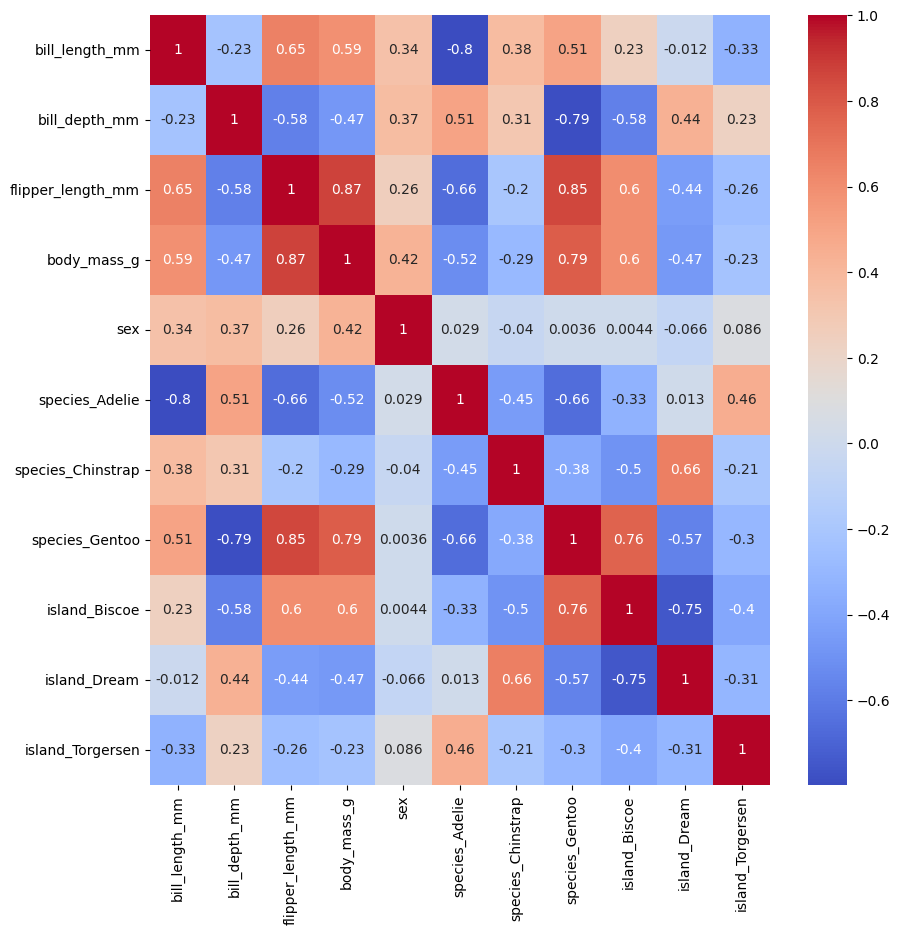

In [130]:
# I converted categorical values into numerical values, now I am gonna find the correlation between them
correlation = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
1. Flipper length and body mass have positive correlation, which means heavier penguins often have longer flippers.
2. bill_length_mm has a strong negative correlation with species_Adelie and a positive correlation with species_Gentoo which means Adelie penguins have shorter bills and Gentoo penguins have longer bills.
3. bill_depth_mm and species_Gentoo are negative correlation, bill_depth_mm is positive correlation with species_Adelie which means Adelie penguins have deeper bills than Gentoo penguins.
4. flipper_length_mm and species_Adelie have a strong negative correlation, flipper length correlates positive correlation with species_Gentoo which means Adelie penguins have the shortest flippers and Gentoo penguins have the longest flippers.
5. body_mass_g has a positive correlation with species_Gentoo and a negative correlation with species_Adelie which means Gentoo penguins are usually heavier and Adelie penguins are lighter than Gentoo.
6. island_Biscoe has strong positive correlation with species_Gentoo and strong negative correlation with island_Dream which means Most Gentoo penguins are more on Biscoe Island. 
7.island_Dream shows a positive correlation with species_Chinstrap which means Chinstrap penguins are more on Dream Island.
8. island_Torgersen has positivelywith species_Adelie which means Adelie penguins are more  on Torgersen Island
9. Sex has positive correlation with bill_length_mm, bill_depth_mm and body_mass_g.

<li>Use hue for the "island" column, <span style="color: red; font-weight: bold;">what can you see in the data this way?</span></li>

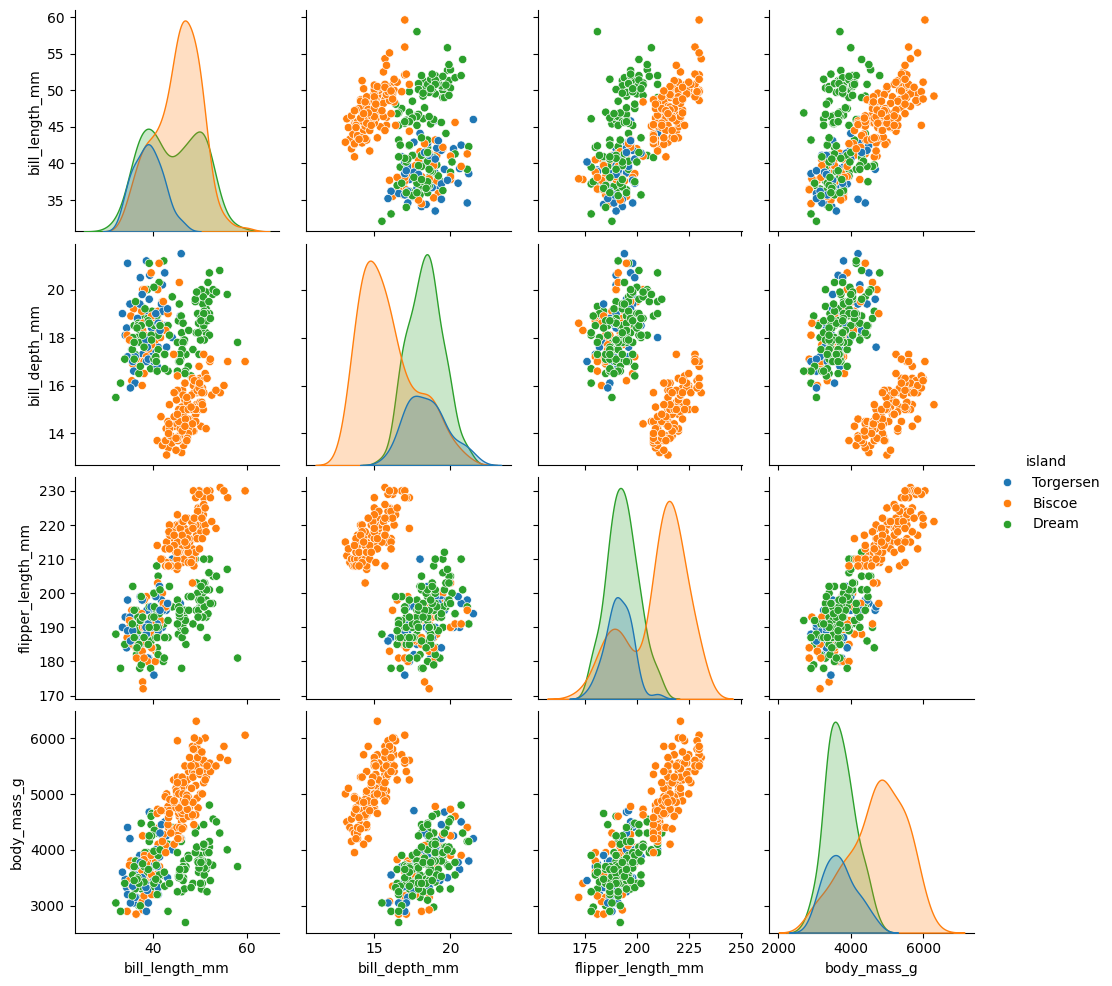

In [131]:
# I reload the original dataset, because it is not encoded and it is easier to understand.
df = sns.load_dataset("datasets/penguins")
sns.pairplot(data = df, hue='island') 

## <span style="color: #20C997;">Personal Analysis</span>
1-The bigger or heavier a penguin is, the longer its flippers and bills usually are.<br>
2-Penguins from different islands have unique characteristics:<br>
<li>Dream island penguins have longer bills
<li>Biscoe island penguins weigh more


<ul>
    <li>Find the amount of penguins on each island by using pandas (<b>value_counts()</b>). <span style="color: red; font-weight: bold;">Which island is different compared to others?</span></li>
    <ul>
        <li><b>Small extra task:</b> visualize the counts with a bar plot</li>
    </ul>
</ul>

In [132]:
# Finding the amount of each group of penguins for each species using groupby
grouped_data = df.groupby(['species', 'island']).size().reset_index(name='count').sort_values(by='count', ascending=False)
grouped_data

,species,island,count
4,Gentoo,Biscoe,124
3,Chinstrap,Dream,68
1,Adelie,Dream,56
2,Adelie,Torgersen,52
0,Adelie,Biscoe,44


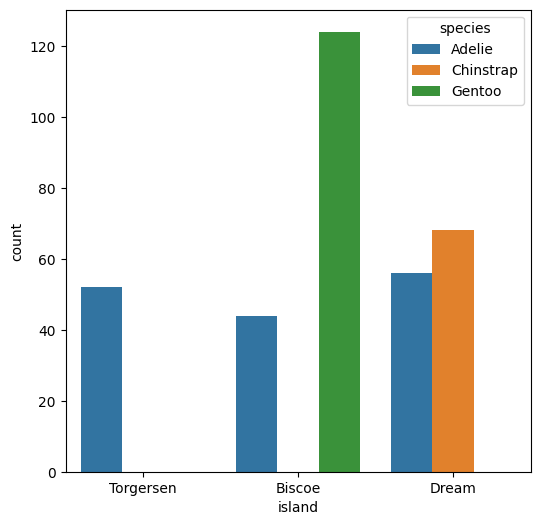

In [133]:
# Visualizing the distribution of species across the islands
plt.figure(figsize=(6, 6))
sns.countplot(x='island', data=df, hue='species')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li>Adelie penguins live everywhere.
<li>Chinstrap penguins live only on Dream island.
<li>Gentoo penguins live only on Biscoe island and are the most common species.

<ul>
    <li>Create now another pair plot, and use hue for the "species" –column</li>
    <ul>
        <li style="color: red; font-weight: bold;">Is there a difference in the distributions when using hue for the islands instead?</li>
        <li><b>Bonus task:</b> <span style="color: red; font-weight: bold;">How much does the "sex"-column affect the result?</span> (MALE / FEMALE)</li>
    </ul>
</ul>

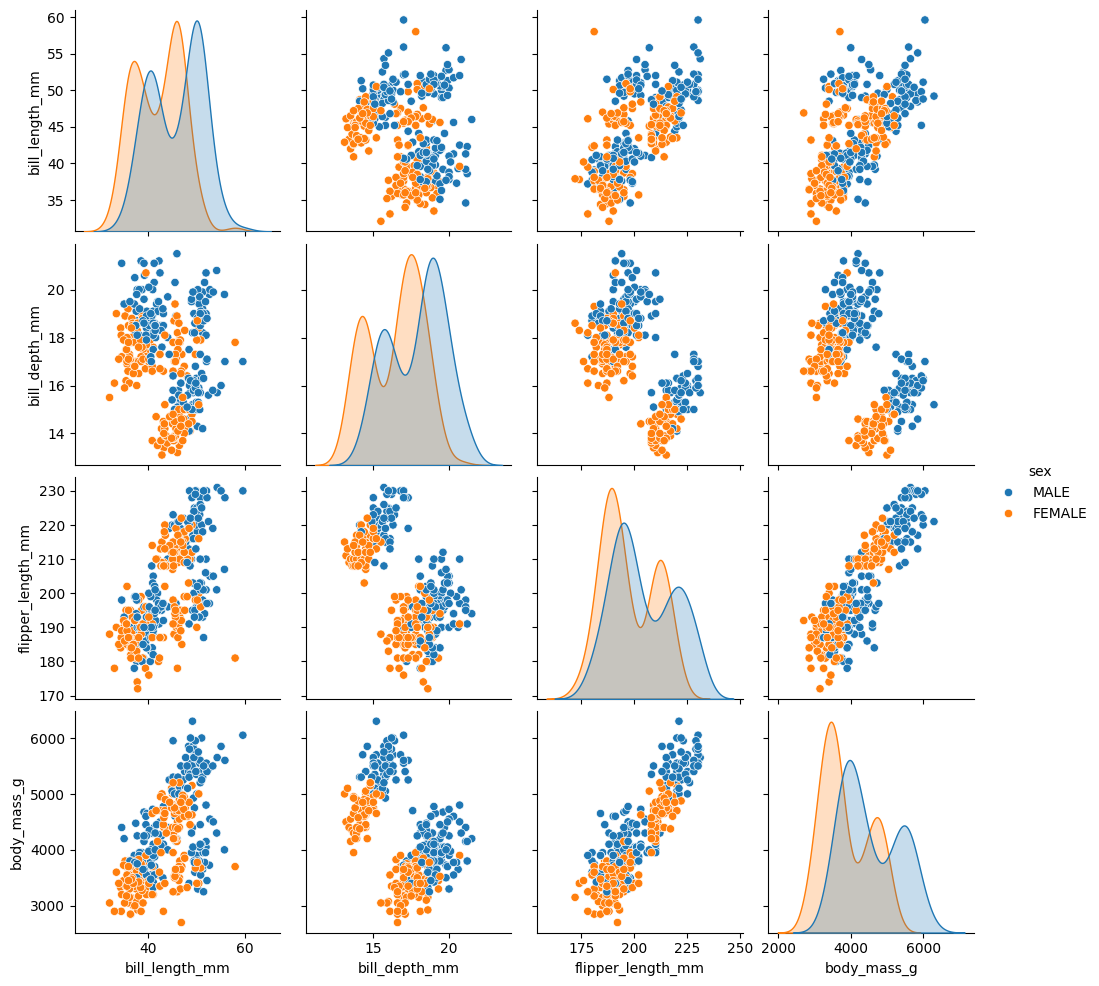

In [134]:
sns.pairplot(data = df, hue='sex')

## <span style="color: #20C997;">Personal Analysis</span>
<li>Males are generally bigger and heavier than females.
<li>Males have longer flippers and higher body mass, but there is some overlap in bill size.

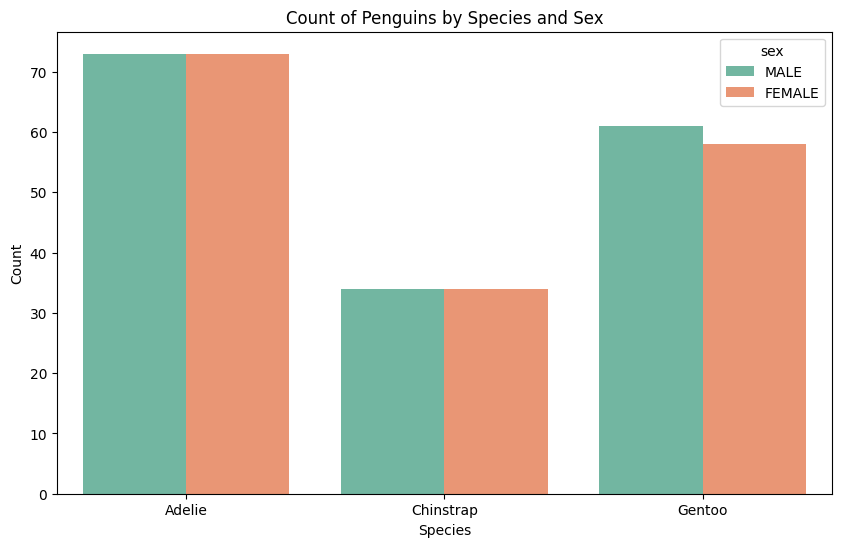

In [135]:
plt.figure(figsize=(10, 6))
sns.countplot(x='species', hue='sex', data=df, palette='Set2')
plt.title('Count of Penguins by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li>Adelie penguins have a balanced number of males and females.
<li>Gentoo penguins have more males than females, but the difference is not a lot.


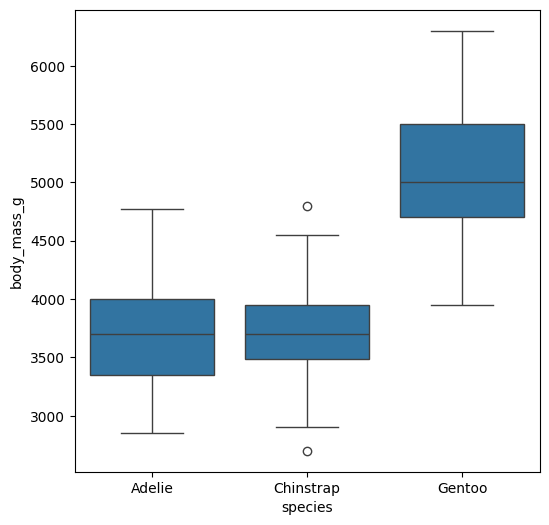

In [136]:
# Now I will compare species based on body_mass_g
plt.figure(figsize=(6, 6))
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li>Adelie and Chinstrap penguins are smaller and have similar body weights.
<li>Gentoo penguins are much larger and heavier than the other two species.

<ul>
    <li>Create a scatter plot for <b><i>bill_length_mm</i></b> and <b><i>flipper_length_mm</i></b>, use species as hue (try also island as hue)</li>
    <ul>
        <li style="color: red; font-weight: bold;">Which affects the result more, species or island?</li> 
    </ul>
</ul>

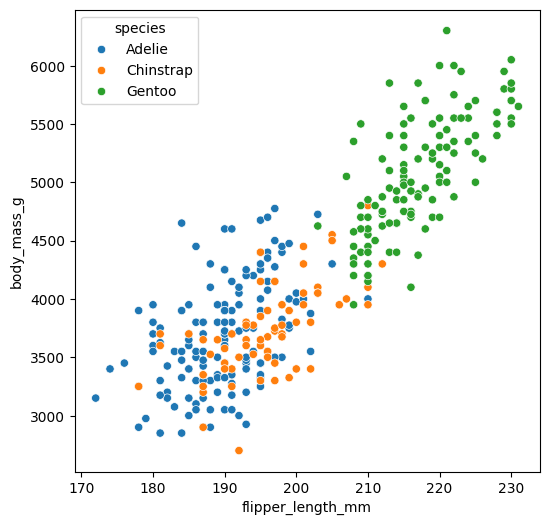

In [137]:
# Since Flipper Length and Body Mass have strong positive correlation, I want to compare them based on the species
# Since I split the species column into 3 columns, I need to reload the dataset
plt.figure(figsize=(6, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df, hue='species')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Adelie has shorter flipper lengths and lighter body masses.
Chinstrap is heavier than Adelie
Gentoo is  clearly larger and heavier

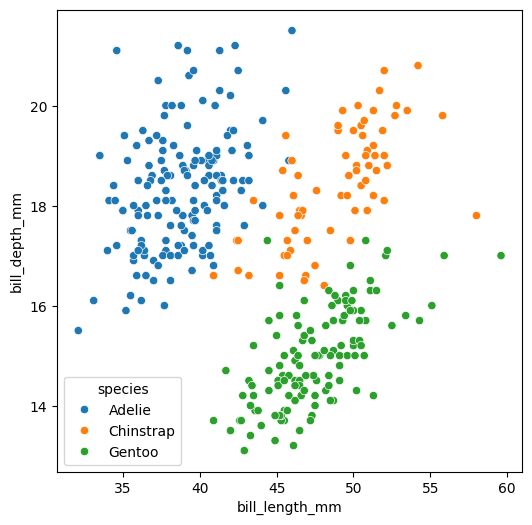

In [138]:
# Now I will compare the bill_length_mm vs. bill_depth_mm based on the species
plt.figure(figsize=(6, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
1. Adelie  has shorter bill lengths  and deeper bill depths
2. Chinstrap has medium bill lengths and bill depths
2. Gentoo has longest bill lengths and shallowest bill depths.

<ul>
    <li>Use box plots, violin plots or swarm plots:</li>
    <ul>
        <li>inspect the following information:</li>
        <ul>
            <li><b></i>flipper_length_mm</i></b></li>
            <li><b></i>bill_length_mm</i></b></li>
            <li><b></i>body_mass_g</i></b></li>
        </ul>
        <li>hue = island,  x= species</li>
        <ul>
            <li style="color: red; font-weight: bold;">What interesting insights/findings can you see in the data this way? </li>
            <li style="color: darkred; font-weight: bold;">Or in other words: "how the data works regarding the variables above?" </li>
        </ul>
    </ul>
</ul>

In [139]:
# code here

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/penguins.png" />


<h4><b>2. In this exercise, use the 'mpg' dataset from seaborn! </b></h4>
<b>-> sns.load_dataset('mpg')</b>
<p>
mpg stands for "miles per gallon", which is a common way to represent fuel consumption in USA.
</p>


In [140]:
# Load the data by sns 
data = sns.load_dataset("datasets/mpg")
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<b>Clean up the data (instructions and tasks below)</b>

<ul>
<li>Create a new column: <b>"liters_per_100km"</b> , which converts the mpg to liters per 100 km</li>
<ul>
<li>You can Google the conversion formula easily: "miles per gallon to liters per 100km" or "How do you convert MPG to l 100km?"
</li>
<li>remove the original mpg –column after this</li>
</ul>

</ul>

In [141]:
# Converting the mpg into liters_per_100KM
data['liters_per_100KM'] = round(235 / data['mpg'], 2)
# Drop the mpg column
data.drop('mpg', axis = 1, inplace = True)
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,liters_per_100KM
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,13.06
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.67
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,13.06
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,14.69
4,8,302.0,140.0,3449,10.5,70,usa,ford torino,13.82


<li>Remove the "name" -column</li>

In [142]:
# Removing the "name" column
data.drop('name', axis = 1, inplace = True)

<ul>
<li>After this, create a correlation matrix. There are two
columns that do not correlate as much as the others,
remove these two from the dataset <span style="color: red; font-weight: bold;">(mention also which columns you decided to remove and why)</span></li>
<ul>
<li style="font-weight: bold;">Create also a heatmap of the correlation matrix after you remove the two unneeded columns</li>
</ul>
</ul>

In [143]:
# Using one hot encoding to convert "region" column into numerical values
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
region_encoded = encoder.fit_transform(data[['origin']]).astype(int)
region_encoded = pd.DataFrame(region_encoded, columns = encoder.get_feature_names_out(['origin']))
data = pd.concat([data, region_encoded], axis = 1)
# Drop the "origin" column
data.drop('origin', axis = 1, inplace = True)   
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,liters_per_100KM,origin_europe,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,70,13.06,0,0,1
1,8,350.0,165.0,3693,11.5,70,15.67,0,0,1
2,8,318.0,150.0,3436,11.0,70,13.06,0,0,1
3,8,304.0,150.0,3433,12.0,70,14.69,0,0,1
4,8,302.0,140.0,3449,10.5,70,13.82,0,0,1


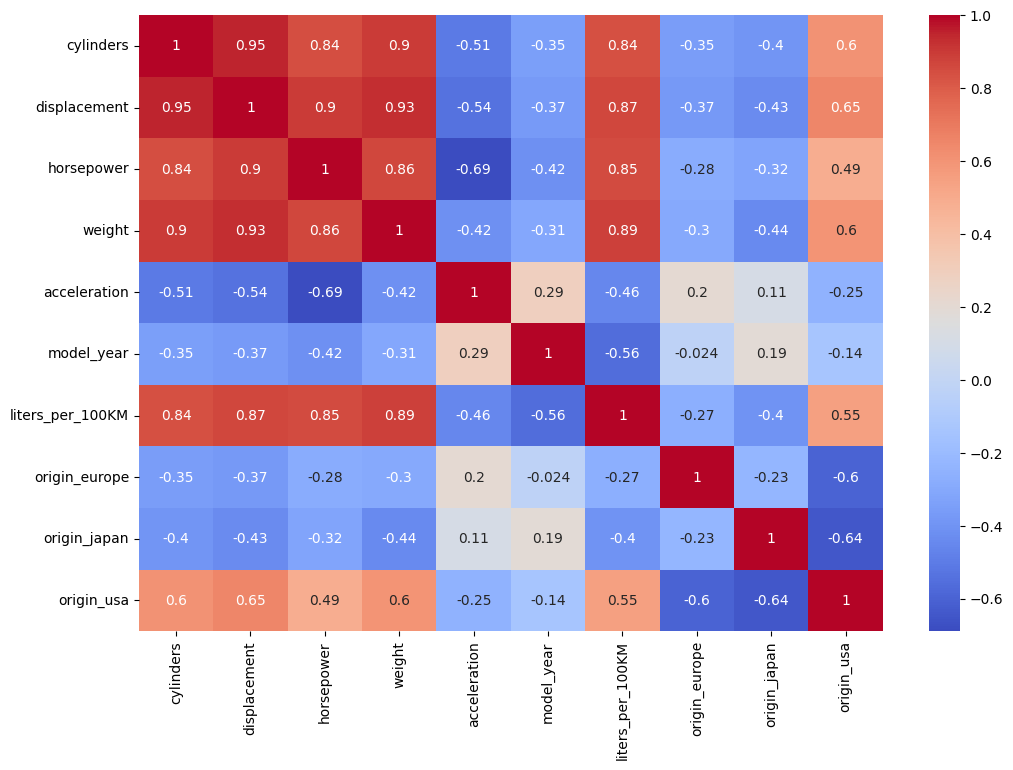

In [144]:
# Since all columns are numerical, I need to check for correlation
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
1. Cylinders, Displacement, Horsepower, and Weight are high correlation with each other. These correlations make sense because larger engines (more cylinders and higher displacement)  have higher horsepower.

2. Acceleration has negative correlation  with  Cylinders and Weight which means heavier cars with more cylinders have slower acceleration.
3. Model Year has  weak correlations with m Cylinders and Weight.
4. Acceleration also has low correlations with Origin.

### Finding the two weak correlated columns
Model Year and Acceleration, because both columns have weak correlation with Cylinders and Horsepower

In [145]:
# Removing the "Model Year"  and Acceleration
data = data.drop(['model_year', 'acceleration'], axis = 1)

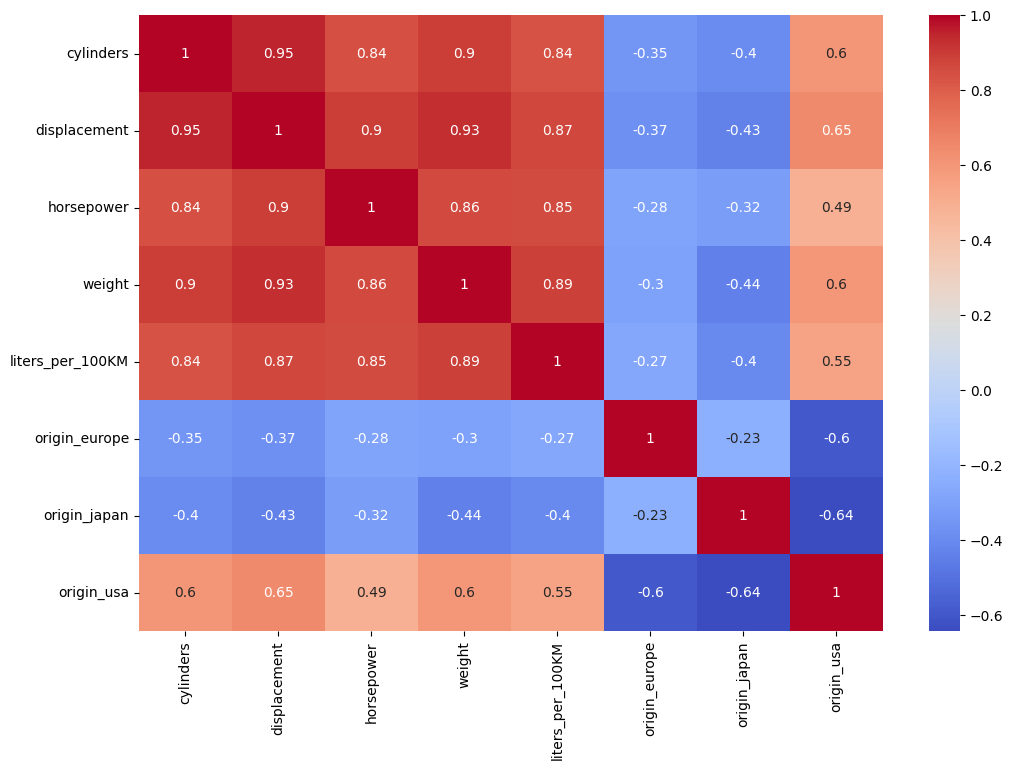

In [146]:
# After removing the columns, I will check for correlation again
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
After I removed the Model Year and Acceleration, now the focus is on the  engine size, weight, and  fuel consumption. <br>
Cars from USA are heavier, bigger, stronger and have more fuel consumption than cars from Europe and Japan 

<ul>
<li>There are three different columns that are strongly
connected to the car's efficiency (both power and
consumption), select one of them and remove the others
from the dataset
</li>
<ul>
<li style="color: red; font-weight: bold;">Which column is the best selection to indicate the
car’s efficiency, and why? (cylinders, horsepower or
displacement/engine size)</li>
<li style="color: darkred; font-weight: bold;">Remember: look at the big picture, also compare how well the variables correlate to other variables than just the consumption</li>
</ul>
</ul>

<b>I pick the Cylinder because it has strong correlation with  fuel consumption, engine size, power, and weight.

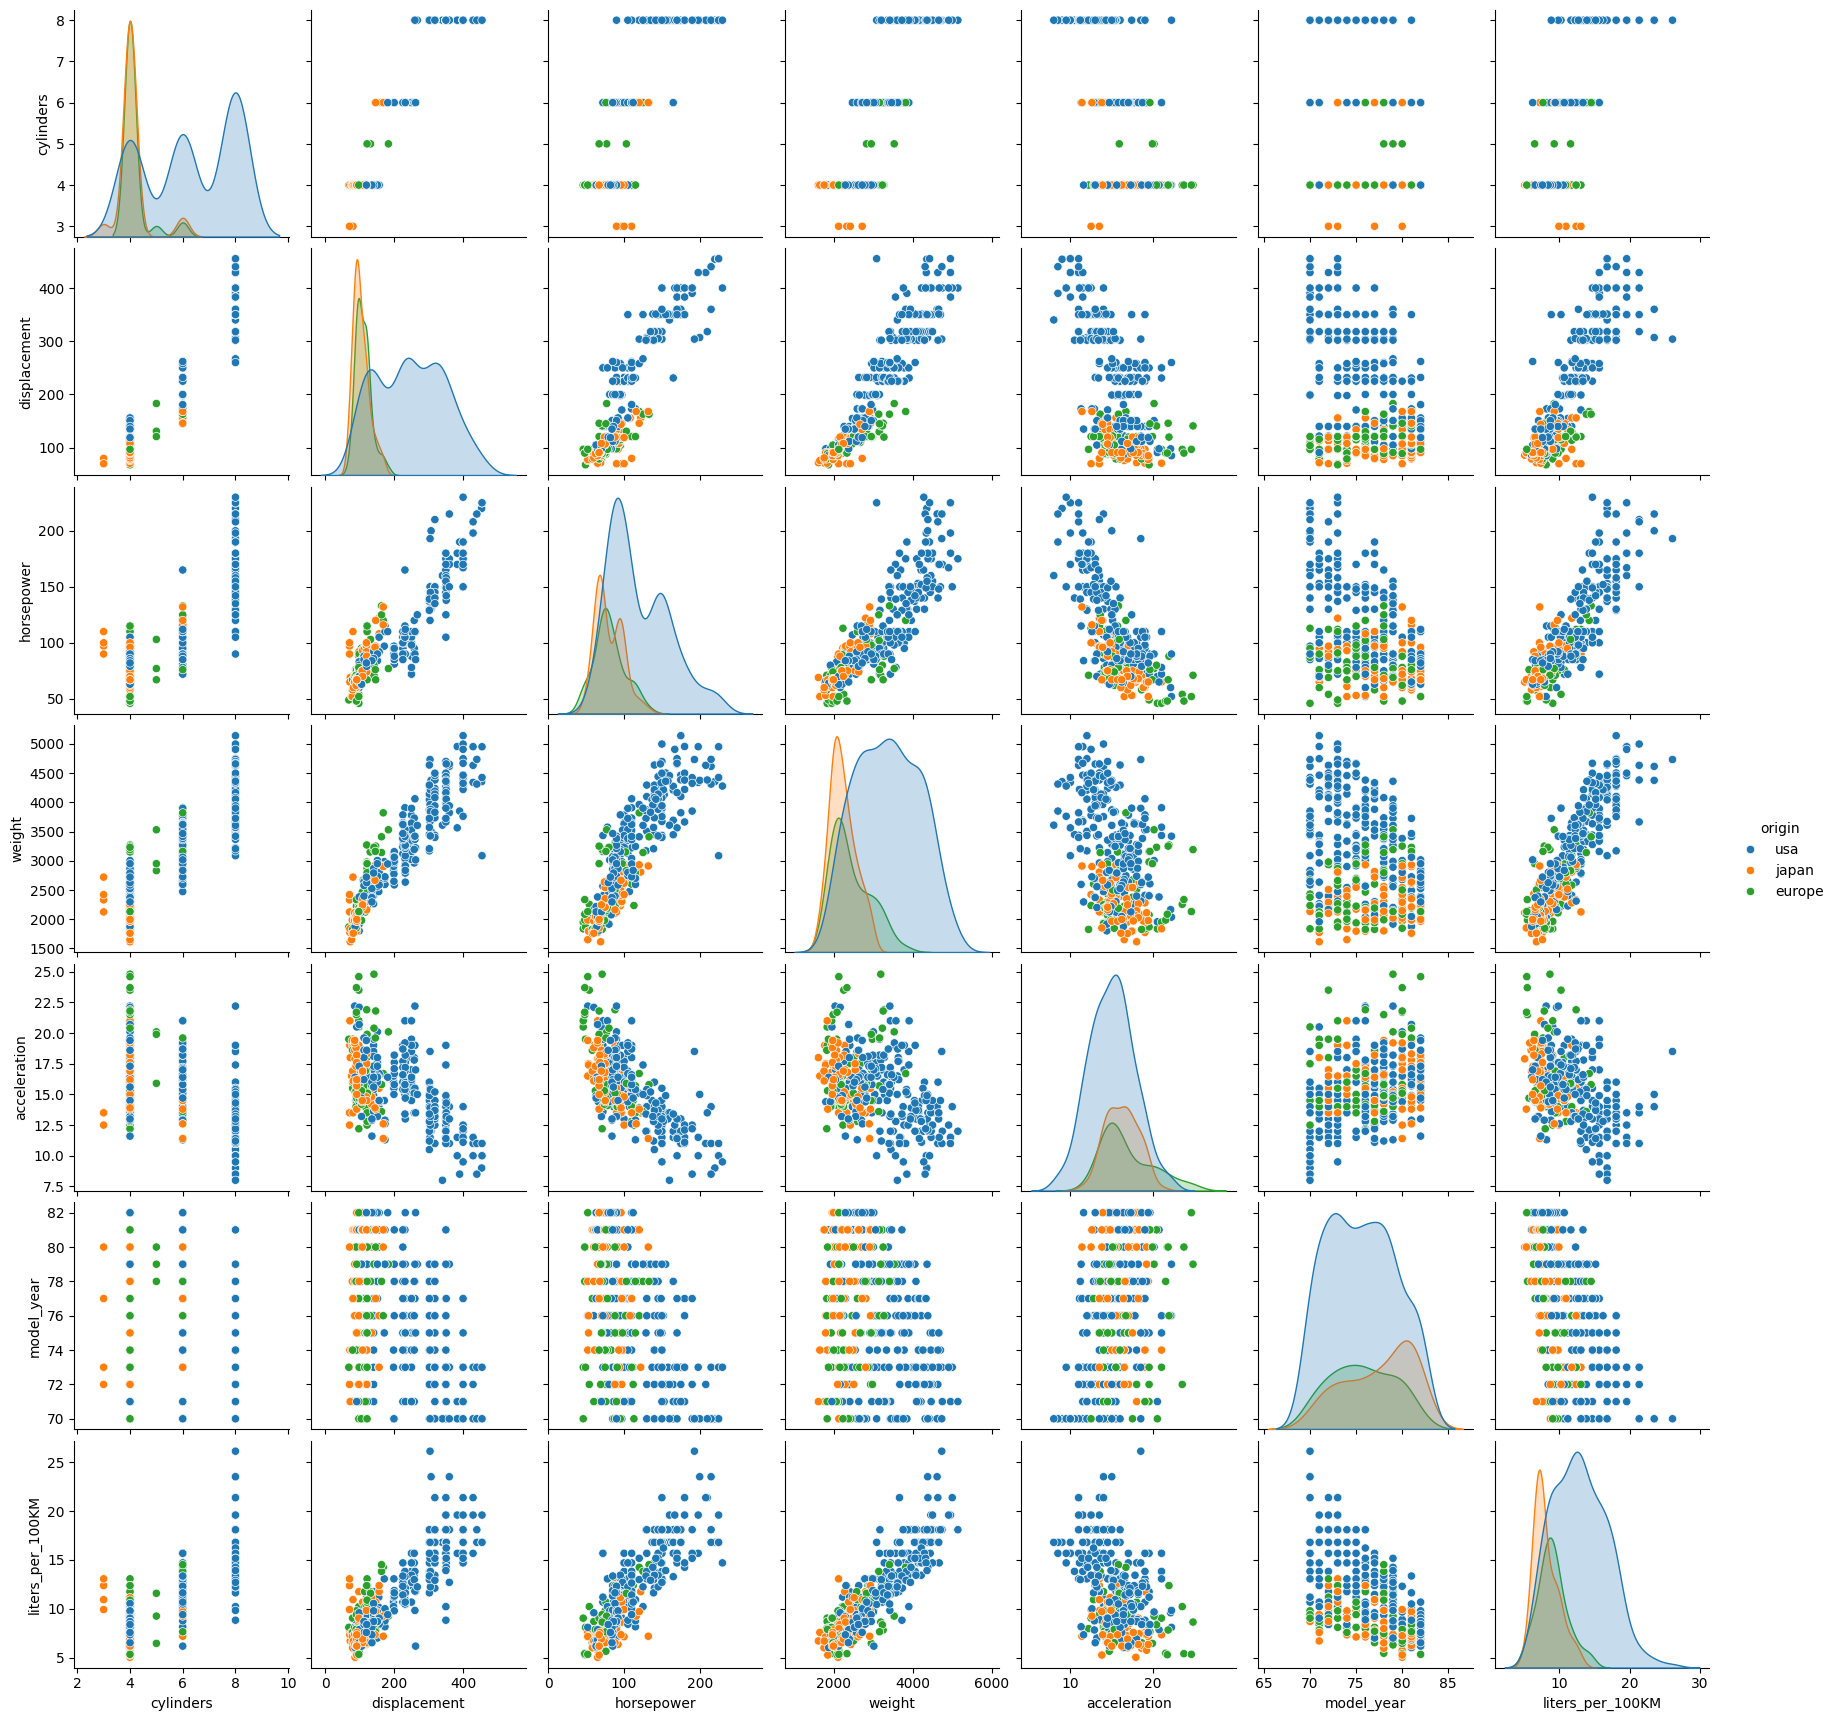

In [147]:
# pair plot with hue for the "origin"
df = pd.read_csv("datasets/cleaned_data.csv")
sns.pairplot(df, hue='origin')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Cars from the USA have the highest horsepower, weight, and engine size and highest liters per 100KM consumption compared to cars from Europe and Japan.<br>
Cars from Japan and Europe have  better fuel efficiency than cars from the USA, these are smaller, lighter and have smaller engines.

<ul>
    <li><b>Finally, use the pair plot and hue (origin)</b></li>
    <ul>
        <li style="color: red; font-weight: bold;">Which origin country tends have bigger fuel consumption in
cars?</li>
<li><span style="color: red; font-weight: bold;">Which is generally the origin with lowest consumption?</span>
(more specific plots might be a good idea here, for example:
box plot, scatter plot etc., pandas functions are helpful too!)</li>
<li style="color: red; font-weight: bold;">What other features the cars seem to have that result into
bigger or lower consumption?</li>
    </ul>
</ul>

In [148]:
# It is so clear that cars from the USA highest consumption of fuel
# let's check the average consumption of fuel for each region
df.groupby('origin')['liters_per_100KM'].mean().sort_values(ascending=False)


origin
usa       12.891510
europe     8.980147
japan      8.055063
Name: liters_per_100KM, dtype: float64

In [149]:
# Let's check the average weight of cars for each region
# I think the weight is in KG so I convert it into Tons
round(df.groupby('origin')['weight'].mean().sort_values(ascending=False)/1000, 2)

origin
usa       3.37
europe    2.43
japan     2.22
Name: weight, dtype: float64

In [150]:
# Categorize number of cylinders based on the Fuel consumption  
numbers_cly = data.groupby('cylinders')['liters_per_100KM'].mean().sort_values(ascending=False)
numbers_cly.round(2).reset_index()

,cylinders,liters_per_100KM
0,8,16.22
1,6,12.10
2,3,11.57
3,5,9.10
4,4,8.32


<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/mpg.png" />


<h4><b>3. csv-data, pandas and seaborn, groceries data</b></h4>


<p>
This dataset has been downloaded from <b><i>kaggle.com</i></b>.<br />
Download the "groceries.csv" from Moodle.
<br /><br />
Load the data by using pandas. (read_csv() etc.)
<br /><br />

<b>Note:</b> since this is an actual dataset from the internet, the data is in quite a rough format.

</p>

In [151]:
from sklearn.impute import SimpleImputer
# load the data
df = pd.read_csv('datasets/groceries.csv')

<li>If you take a look at the data, you will notice three columns have NaN –
values. You can either remove these columns all together, or you can fill
the missing values with average values of that column. For example, for
the Fish -column you could do something like this:<br /><br />

<b>df['Fish'].fillna((df['Fish'].mean()), inplace=True)</b><br /><br />
In this case, food is the name of the DataFrame we just got from the csv-file. Do this same operation to the two other columns with missing
values.</li>

In [152]:
# check the nan values
df.isnull().sum()

Month              0
Rice               0
Wheat              0
Barley             0
Corn               0
Peanuts            0
Sugar              0
Coconut-oil        0
Palm-oil           0
Sunflower-oil    141
Chicken            0
Beef               0
Pork              39
Fish              39
Tea                0
Coffee             0
dtype: int64

In [153]:
# Fill out miss values of Sunflower oil, Pork Fish  with the mean 

median_imputer  = SimpleImputer(strategy='mean')
df['Sunflower-oil'] = median_imputer.fit_transform(df[['Sunflower-oil']])
df['Pork'] = median_imputer.fit_transform(df[['Pork']])
df['Fish'] = median_imputer.fit_transform(df[['Fish']])

<ul>
<li>In this data, the date column is a bit difficult to use, since it's not
completely in numerical format. Split the Month-column so, that you
have two different columns: Month and Year</li>
<ul>
<li>For month, use a numeric format 1-12</li>
<li>For year, use the full year 1990-2020</li>
<li>Check out the examples in Moodle, this one is a bit tricky, but
very neat to know how it's done!</li>
</ul>
</ul>

In [ ]:
# This code is taken from Moodle

# we need the calendar module for this one
import calendar

# function one, this fixes the month
# luckily Python has a module called calendar
# which can convert these abbrevations to numbers
def change_month(row):
    return list(calendar.month_abbr).index(row['Month'])


# function two
# fill in the missing part of the year
def fix_year(row):
    year = int(row['Year'])
    if year > 50:
        return int(f"19{row['Year']}")
    else:
        return int(f"20{row['Year']}")


# before you apply the functions to year and month, we need
# to split the original date into two columns:

# if using Python 3.9, try this if the code doesn't work
# df[['Month', 'Year']] = df['Month'].str.split('-', 1, expand=True)
df[['Month', 'Year']] = df['Month'].str.split('-', expand=True)
# apply the change_month function
df['Month'] = df.apply(change_month, axis=1)
# apply the fix_year function
df['Year'] = df.apply(fix_year, axis=1)

<li>After the cleanups, create a correlation matrix of the data. Create a heatmap on the correlations as well.
<br /><br />
<span style="color: red; font-weight: bold;">Which grocery stands out?</span> (i.e. there seems to be one grocery item
whose price doesn't follow other groceries at all)
</li>

In [167]:
# Creating correlation matrix
corr = df.corr()
corr

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee,Year
Month,1.000000,-0.044979,-0.013236,-0.030244,-0.044408,-0.001781,0.003578,-0.040258,-0.046552,-0.005825,-0.015935,0.006254,-0.049440,-0.080344,-0.030672,-0.000688,0.019208
Rice,-0.044979,1.000000,0.764992,0.725854,0.820150,0.696030,0.704375,0.646414,0.793909,-0.082812,0.652289,0.616056,0.348913,0.473308,0.643568,0.567478,-0.288204
Wheat,-0.013236,0.764992,1.000000,0.892162,0.890443,0.580613,0.640290,0.618246,0.822121,-0.063324,0.646178,0.528809,0.398452,0.407069,0.477763,0.547567,-0.379988
Barley,-0.030244,0.725854,0.892162,1.000000,0.907648,0.609116,0.620424,0.529652,0.792855,-0.025409,0.619077,0.432840,0.386439,0.296844,0.507331,0.448200,-0.447627
Corn,-0.044408,0.820150,0.890443,0.907648,1.000000,0.710431,0.755538,0.680974,0.837823,0.007242,0.678824,0.615079,0.479255,0.466458,0.631756,0.562999,-0.348241
Peanuts,-0.001781,0.696030,0.580613,0.609116,0.710431,1.000000,0.611945,0.603114,0.684083,-0.155459,0.498765,0.628254,0.439308,0.393605,0.549859,0.420156,-0.260257
Sugar,0.003578,0.704375,0.640290,0.620424,0.755538,0.611945,1.000000,0.691739,0.761629,-0.078173,0.564009,0.566042,0.376719,0.607986,0.673708,0.584662,-0.281182
Coconut-oil,-0.040258,0.646414,0.618246,0.529652,0.680974,0.603114,0.691739,1.000000,0.835128,0.007093,0.659971,0.662576,0.276655,0.608828,0.662326,0.612844,-0.301526
Palm-oil,-0.046552,0.793909,0.822121,0.792855,0.837823,0.684083,0.761629,0.835128,1.000000,-0.086490,0.645418,0.560498,0.278544,0.506403,0.620940,0.709686,-0.286684
Sunflower-oil,-0.005825,-0.082812,-0.063324,-0.025409,0.007242,-0.155459,-0.078173,0.007093,-0.086490,1.000000,0.042563,-0.172918,0.024800,-0.310311,0.005189,-0.095457,-0.006863


#### Which grocery stands out?
Sunflower-oil, it has weak relationship.

<li style="color: red; font-weight: bold;">Which groceries seem to correlate to each other's prices? What do they have in common?</li>

## Year has strong correlation to each columns! 
1. Wheat and Barley (0.89):  They both belong to the grass family
2. Corn and Barley (0.91): The demand for barley as a substitute for corn in livestock feed will remain a significant price determinant.
3. Palm-oil and Coconut-oil (0.84): Coconut oil is derived from the coconut fruit
4. Rice and Corn (0.82): They're all part of the grass family (Poaceae) and are responsible for feeding humankind more than any other group of plants.
5. Chicken and Beef (0.78):chicken has become relatively cheaper compared to beef.
### What they have in common:
Grains (like wheat, corn, barley): Similar farming conditions and usage.<br>
Oils (palm and coconut): Both are used in cooking and follow similar supply-demand trends.<br>
Proteins (chicken and beef): Substitutable in diets, so their prices often move together.<br>

Sources: Searching on Google,

<b>Bonus task:</b>
<p>Sometimes data can also reflect history! For example, "Corn" and some
other foods seem to have a notable peak in its price in one of the years.
Find this year, and Google if you can find a reason for the price peak (for
example, search: "us corn expensive XXXX". <span style="color: red; font-weight: bold;">Can you find any other food
that has relation to a real world event in a similar in this dataset?</span></p>
<p><b>Tip:</b> use pivot table and heatmap! Remember also, the first year in the
dataset might show as blank white, that means there's no data. You
should also split the date</p>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/food.png" />


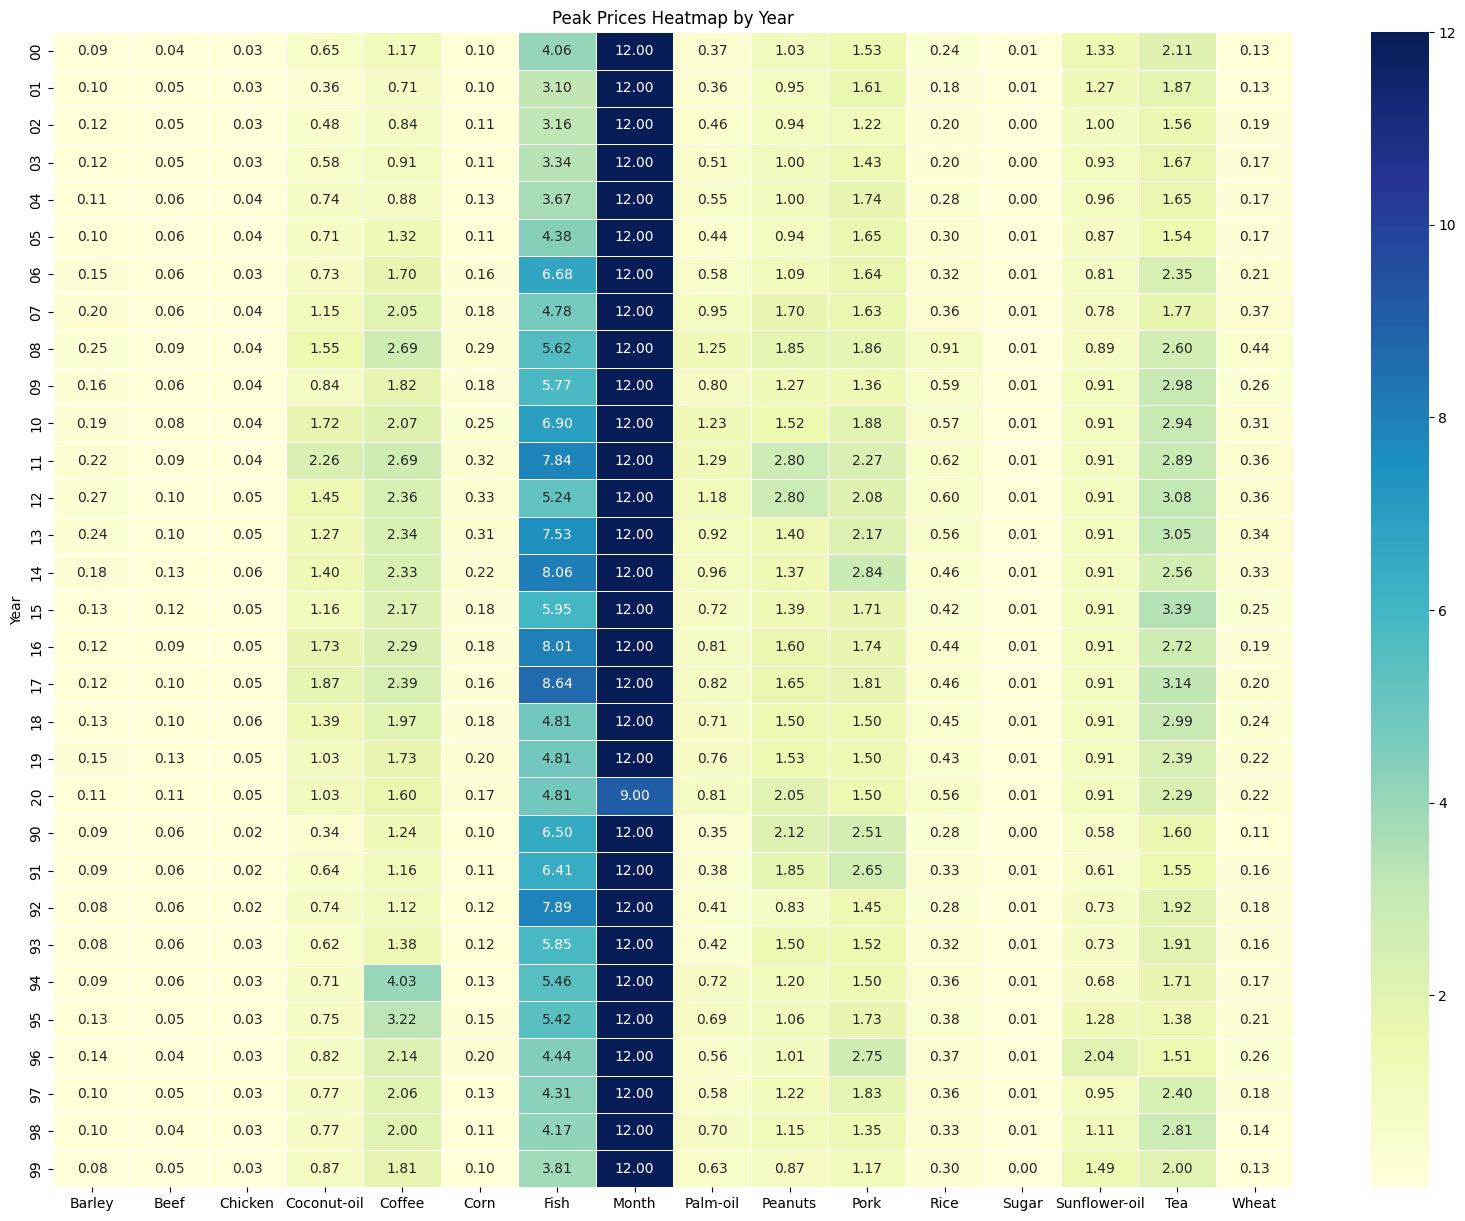

,Barley,Beef,Chicken,Coconut-oil,Coffee,Corn,Fish,Month,Palm-oil,Peanuts,Pork,Rice,Sugar,Sunflower-oil,Tea,Wheat
Year,,,,,,,,,,,,,,,,
00,0.09,0.0441,0.0300,0.65,1.17,0.10,4.06,12,0.37,1.03,1.5322,0.24,0.0053,1.33,2.11,0.13
01,0.10,0.0522,0.0324,0.36,0.71,0.10,3.10,12,0.36,0.95,1.6087,0.18,0.0051,1.27,1.87,0.13
02,0.12,0.0529,0.0313,0.48,0.84,0.11,3.16,12,0.46,0.94,1.2156,0.20,0.0040,1.00,1.56,0.19
03,0.12,0.0538,0.0337,0.58,0.91,0.11,3.34,12,0.51,1.00,1.4288,0.20,0.0044,0.93,1.67,0.17
04,0.11,0.0619,0.0392,0.74,0.88,0.13,3.67,12,0.55,1.00,1.7388,0.28,0.0042,0.96,1.65,0.17


In [168]:
pivot_table = df.pivot_table(index='Year', aggfunc='max')

# We can now plot this as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Peak Prices Heatmap by Year')
plt.show()
pivot_table.head()

1. High beef prices in 2014 happened because of severe droughts, higher feed costs, more global demand, and fewer cattle in the U.
2. Coffee prices went up in 1994 because a frost in Brazil, the biggest coffee producer, reduced the supply. Strong global demand also pushed prices higher.
3. Tea prices were high in 1995 due to bad weather.
4. Chicken prices were high in 1992 because feed costs went up because of expensive corn and soybeans.
5. Palm oil prices were high in 2011 due to more demand for biodiesel, weather problems in key producing countries.
6. Coconut oil prices were high in 2011 because of supply issues, higher demand for food and biofuels, and competition with other oils.
7. Sugar prices rose in 2011 because bad weather hit key countries.
8. Peanut prices were high in 2012 due to a severe drought in the U.S., the top peanut producer. The drought lowered crop yields, and steady demand caused prices to rise.
9. Corn prices went up in 2012 because of a severe drought in the U.S., the largest corn producer.
10. Barley prices were high in 2012 due to extreme weather.
11. Wheat prices rose in 2012 mainly because of droughts in key producing countries like the U.S. and Russia.
12. Rice prices increased in 2012 because of weather.

Source: Searching on the internet.

<h4><b>4. csv-data, pandas and seaborn, mobile phone data, regression plots</b></h4>


In [169]:
data = pd.read_csv('datasets/mobile phone price.csv')

<p>This dataset has been downloaded from <b><i>kaggle.com</i></b> and modified. <br />
Download the "mobilephones.csv" from Moodle.  Load the data by using pandas.  (read_csv() etc.)</p>

<p>
Regression plots (<b>lmplot()</b> in seaborn) are often extremely useful in finding more insight and "hidden connections" in your data. </p>

<p>
Remember to also check out the confidence interval, if it's wide around the regression line = there's usually fluctuation within the values. <br />Narrow line => the linear connection is quite evident.</p>


<b>With the mobile phone data, do the following:</b>

<ul>

<li>Use regression plot for RAM and Price, no hue</li>
<ul>
    <li style="color: red; font-weight: bold;">What is the correlation based on the regression line?</li>
</ul>



</ul>

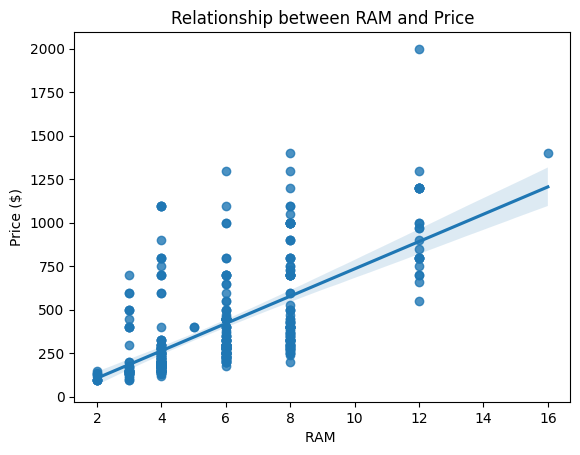

In [170]:
# RAM and price are  object type, I have to convert them to numeric type
data['RAM '] = data['RAM '].str.replace('GB', '').str.strip().astype(int) 
data['Price ($)'] = data['Price ($)'].str.replace(r'[\$,]', '', regex=True).str.strip().astype(int)

# Using regression plot to see the relationship between RAM and Price
sns.regplot(x='RAM ', y='Price ($)', data=data)
plt.title('Relationship between RAM and Price')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
The regression plot shows that when RAM increases,the price also increases. It seems some RAMs are so pricy, it can be outlier 

<ul>
<li>Use regression plot for RAM and Price, hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">How is the correlation different when compared to without hue?</li>
</ul>
</ul>

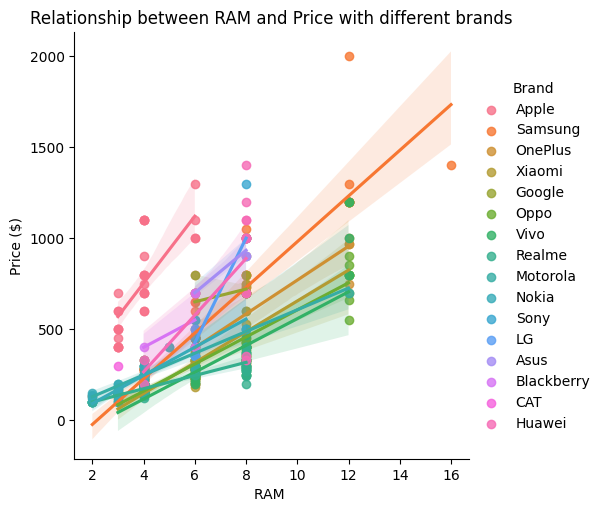

In [171]:
# Using regression plot for RAM and Price with different brands
sns.lmplot(x='RAM ', y='Price ($)', data=data, hue='Brand')
plt.title('Relationship between RAM and Price with different brands')
plt.show()# code here

## <span style="color: #20C997;">Personal Analysis</span>
Some brands like Apple, have clearly higher prices for the same RAM compared to others.

<ul>
<li>Use regression plot for BatteryCapacity and Price, no hue</li>
<ul>
    <li style="color: red; font-weight: bold;">What is the correlation based on the regression line?</li>
</ul>


</ul>

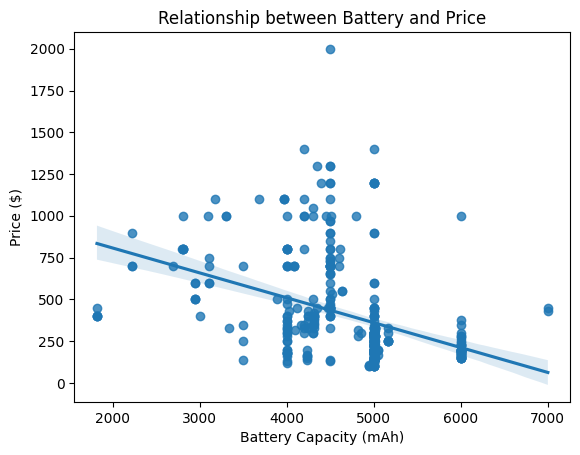

In [172]:
# Using regression plot for Battery and Price
sns.regplot(x='Battery Capacity (mAh)', y='Price ($)', data=data)
plt.title('Relationship between Battery and Price')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Battery capacity increases, but the price  decreases slightly. Some mobile phones are very expensive with same battery capacity, I think because of brand

<ul>
<li>Use regression plot for BatteryCapacity and Price, hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">How is the correlation different when compared to without hue?</li>
</ul>
</ul>

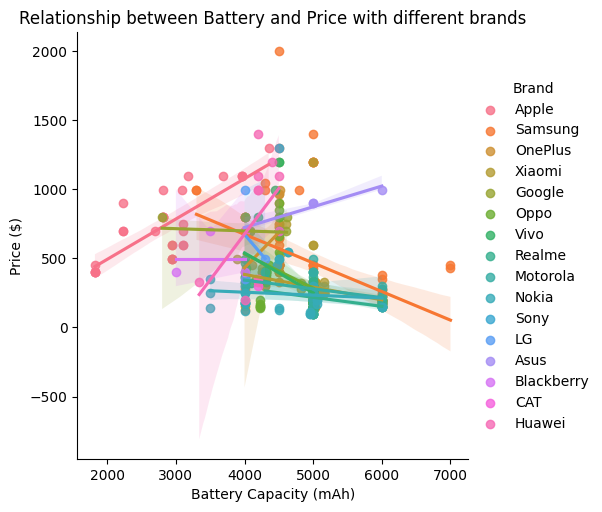

In [173]:
# Using regression plot for Battery and Price with different brands
sns.lmplot(x='Battery Capacity (mAh)', y='Price ($)', data=data, hue='Brand')
plt.title('Relationship between Battery and Price with different brands')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Since I mentioned above that some phones are more expensive than others with same battery capacity. because of the brand.

<ul>
<li><b>Bonus task:</b> Use regression plot for ScreenSize and Price, without and with hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">Compare the correlations with and without hue. Is there a difference?</li>
</ul>
</ul>

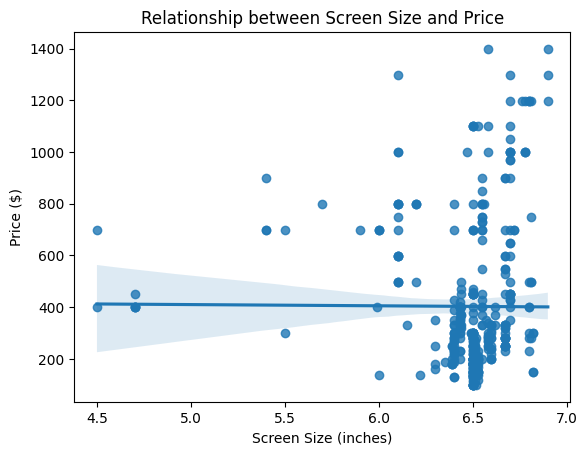

In [174]:
# Before using regression plot for Screen Size and Price, it can guess as always the brand has bigger impact on price than screen size
# I need to convert the screen size to numeric type
data['Screen Size (inches)'] = pd.to_numeric(data['Screen Size (inches)'], errors='coerce')

# Using regression plot for Screen Size and Price
sns.regplot(x='Screen Size (inches)', y='Price ($)', data=data)
plt.title('Relationship between Screen Size and Price')
plt.show()

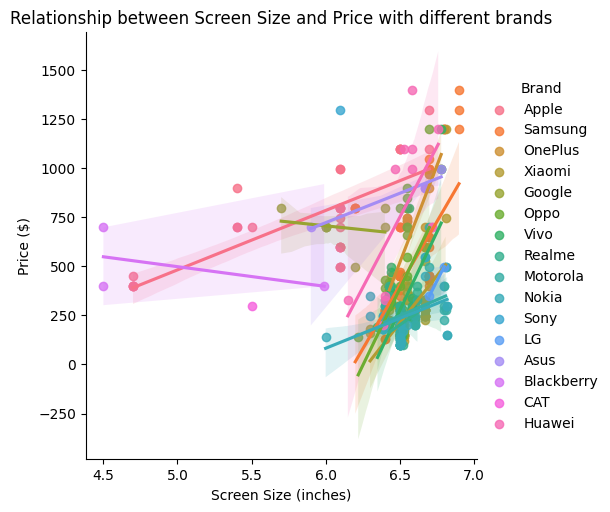

In [175]:
# Using regression plot for Screen Size and Price with different brands
sns.lmplot(x='Screen Size (inches)', y='Price ($)', data=data, hue='Brand')
plt.title('Relationship between Screen Size and Price with different brands')
plt.show()

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/mobilephone.png" />

As I guessed, the brand has stronger correlation with price than screen size 


<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li>1. <b>seaborn:</b> Try out Boxenplot and/or Dendrogram in any of the previous
dataset exercises. Do these plot types provide some interesting info on
the data? (Google for examples on these plot types)</li>
<ul>
<li>You may also consider some other plots, for example:
<b>displot, catplot, relplot</b></li>
</ul>
</ul>

In [162]:
# code for the advanced extra task

<ul>
<li><b>2. Use the "titanic" dataset from the seaborn datasets
(sns.load_dataset('titanic')).</b> Find out the features of a typical person
that survived or did not survive the sinking of Titanic.</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/titanic.png"/>

In [163]:
# code for the advanced extra task, you can also create a separate notebook for this 
# (might be a better idea, since a new dataset always adds quite much new code)

<li><b>3. Use the "taxis" dataset from the seaborn datasets
(sns.load_dataset('taxis')).</b> Find out any correlations or interesting
behaviors based on any columns in the data (color, payment,
pickup_borough, dropoff_borough etc.)
<br /><br />

<b>Notes and ideas to try out:</b><br />
Consider removing the pickup_zone and dropoff_zone, since there are
way too many alternatives. Borough is the larger area in question, which
can be helpful while grouping data (hue!)<br /><br />
How about pickup and dropoff times, should they be modified? From
taxi point of view, is the weekday and time of day (morning, day,
evening, night) more interesting than the actual dates?
<br /><br />
These are just ideas, you're free to come up with your own ideas
regarding the data!</li>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/taxis.png"/>


In [164]:
# code for the advanced extra task, you can also create a separate notebook for this 
# (might be a better idea, since a new dataset always adds quite much new code)

<ul>
<li><b>4. Try out any of the previous examples and exercises by using any or many
of the following additional plotting libraries:<br /><br />
</li>
<ul>
<li><b>Matplotlib (this is the most common in addition to seaborn,
especially regarding machine learning, recommended to learn)</b><br />
<a href="https://matplotlib.org/stable/tutorials/index.html#introductory">https://matplotlib.org/stable/tutorials/index.html#introductory</a><br /><br /></li>
<li><b>Plotly</b><br />
<a href="https://plotly.com/python/getting-started/">https://plotly.com/python/getting-started/</a><br /><br /></li>
<li><b>Bokeh</b><br /><a href="https://docs.bokeh.org/en/latest/docs/user_guide.html">https://docs.bokeh.org/en/latest/docs/user_guide.html</a>
<br /><br /></li>
</ul>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/charts.png" />

In [165]:
# code for the advanced extra task, you can also create a separate notebook for this 
# (might be a better idea, since a new dataset always adds quite much new code)

<ul>
<li><b>5. Try out any of the datasets below, or find yourself an interesting csvdataset from kaggle.com!  </b><br>

Use all your skills in numpy, pandas and seaborn, and find out features in
the data. <br ><br />
<b>Was there something that is surprising in the dataset? What
interesting correlations did you find?</b>
<br><br>
<b>Some interesting datasets, examples (you can find you own too!):</b>
</li>
<ul>
<li><a href="https://www.kaggle.com/anamvillalpando/world-happiness-ranking">https://www.kaggle.com/anamvillalpando/world-happiness-ranking</a></li>
<li><a href="https://www.kaggle.com/sakshigoyal7/credit-card-customers">https://www.kaggle.com/sakshigoyal7/credit-card-customers</a></li>
<li><a href="https://www.kaggle.com/lucabasa/dutch-energy">https://www.kaggle.com/lucabasa/dutch-energy</a></li>
<li><a href="https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv">https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv</a></li>
<li><a href="https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv">https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv</a></li>
<li><a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv">https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv</a><br /><br /></li>
</ul>
<li><b>Note:</b> These datasets can be quite rough to handle at first, feel free to
ask tips from your instructor if some dataset interests you!</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_5.png" />

In [166]:
# do any Kaggle.com -related extra tasks in their own Jupyter notebooks for easier coding